In [541]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [542]:
df = pd.read_csv("winequality-red.csv")

In [543]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [544]:
df.shape

(1599, 12)

In [545]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [546]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [547]:
df["chlorides_sulphates_sum"] = df["chlorides"] + df["sulphates"]

In [548]:
df = df.drop(df[df["residual sugar"]>5.0].index)
df= df.drop(df[df["chlorides"]>0.2].index)
df = df.drop(df[df["sulphates"]>1.125].index)

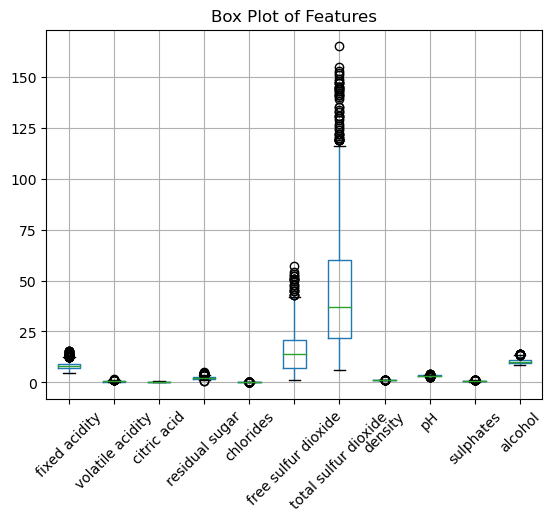

In [549]:
df.boxplot(column=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"])
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

In [550]:
X = df.drop("quality", axis=1)
y = df['quality'].apply(lambda x:1 if x>=7 else 0)

In [551]:
from sklearn.model_selection import train_test_split

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [553]:
from sklearn.preprocessing import StandardScaler

In [554]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [555]:
from sklearn.neighbors import KNeighborsClassifier

In [556]:
from sklearn.metrics import accuracy_score

In [557]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [558]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [559]:
knn_y_pred = knn_model.predict(X_test_scaled)

In [560]:
accuracy_score(y_test, knn_y_pred)

0.8737201365187713

In [561]:
from sklearn.metrics import mean_squared_error, r2_score

In [562]:
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

In [563]:
print("K-Nearest Neighbors (KNN) Model:")
print("Mean Squared Error:", knn_mse)
print("R-squared:", knn_r2)

K-Nearest Neighbors (KNN) Model:
Mean Squared Error: 0.12627986348122866
R-squared: -0.07124505928853764


In [564]:
from sklearn.naive_bayes import GaussianNB

In [565]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [566]:
nb_y_pred = nb_model.predict(X_test_scaled)

In [567]:
accuracy_score(y_test, nb_y_pred)

0.863481228668942

In [568]:
nb_mse = mean_squared_error(y_test, nb_y_pred)
nb_r2 = r2_score(y_test, nb_y_pred)

In [569]:
print("\nNaive Bayes Model:")
print("Mean Squared Error:", nb_mse)
print("R-squared:", nb_r2)


Naive Bayes Model:
Mean Squared Error: 0.13651877133105803
R-squared: -0.15810276679841917


In [570]:
from sklearn.ensemble import RandomForestClassifier

In [571]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [572]:
y_pred = model.predict(X_test_scaled)

In [573]:
accuracy_score(y_test, model.predict(X_test_scaled))

0.9010238907849829

In [574]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [575]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.09897610921501707
R-squared: 0.16037549407114615
